In [2]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [211]:
fb = pd.read_csv('Foreign_Bond.csv')
fe = pd.read_csv('Foreign_ETF.csv')
db = pd.read_csv('US_bonds.csv')
de = pd.read_csv('US_ETF.csv')
gld = pd.read_csv('Gold.csv')

# drop rows with invalid monthly returns
fb = fb[fb['dret'].notnull()]
fe = fe[fe['dret'].notnull()]
db = db[db['dret'].notnull()]
de = de[de['dret'].notnull()]
gld = gld[gld['dret'].notnull()]

In [229]:
for i in ['fe','fb','de','db','gld']:
    
    # convert string to float
    eval("{}".format(i))['dret'] = eval("{}".format(i))['dret'].astype(float)
    
    # extract year from date
    eval("{}".format(i))['year'] = eval("{}".format(i))['caldt'].map(lambda x: floor(x/10000))
 
    # 1 + daily return
    eval("{}".format(i))['return'] = eval("{}".format(i))['dret'] + 1 


In [244]:
# calculate annual return
fb_annual_ret = fb[['crsp_fundno','return','year']].groupby(['crsp_fundno','year']).prod() - 1
fb_annual_ret = fb_annual_ret.reset_index()

# calculate annualized return
fb_annualized_return = ((fb_annual_ret['return'][1:]+1).prod())**0.1 - 1

# calculate annualized standard deviation
fb_annualized_std = fb_annual_ret['return'][1:].std()

# calculate sharpe ratio
fb_sharpe = fb_annualized_return/fb_annualized_std

# repeat the same process for fe, db, de and gld
fe_annual_ret = fe[['crsp_fundno','return','year']].groupby(['crsp_fundno','year']).prod() - 1
fe_annual_ret = fe_annual_ret.reset_index()
fe_annualized_return = ((fe_annual_ret['return'][1:]+1).prod())**0.1 - 1
fe_annualized_std = fe_annual_ret['return'][1:].std()
fe_sharpe = fe_annualized_return/fe_annualized_std


db_annual_ret = db[['crsp_fundno','return','year']].groupby(['crsp_fundno','year']).prod() - 1
db_annual_ret = db_annual_ret.reset_index()
db_annualized_return = ((db_annual_ret['return'][1:]+1).prod())**0.1 - 1
db_annualized_std = db_annual_ret['return'][1:].std()
db_sharpe = db_annualized_return/db_annualized_std


de_annual_ret = de[['crsp_fundno','return','year']].groupby(['crsp_fundno','year']).prod() - 1
de_annual_ret = de_annual_ret.reset_index()
de_annualized_return = ((de_annual_ret['return'][1:]+1).prod())**0.1 - 1
de_annualized_std = de_annual_ret['return'][1:].std()
de_sharpe = de_annualized_return/fe_annualized_std


gld_annual_ret = gld[['crsp_fundno','return','year']].groupby(['crsp_fundno','year']).prod() - 1
gld_annual_ret = gld_annual_ret.reset_index()
gld_annualized_return = ((gld_annual_ret['return'][1:]+1).prod())**0.1 - 1
gld_annualized_std = gld_annual_ret['return'][1:].std()
gld_sharpe = gld_annualized_return/gld_annualized_std

In [234]:
# calculate maximum drawdown, window period = 252 days
fe_drawdown = fe[['dnav']]
fb_drawdown = fb[['dnav']]
de_drawdown = de[['dnav']]
db_drawdown = db[['dnav']]
gld_drawdown = gld[['dnav']]

for i in ['fe','fb','de','db','gld']:
    eval("{}_drawdown".format(i))['max'] = 0.0
    for j in range(len(fe)):
        if j <= 252:
            eval("{}_drawdown".format(i))['max'][j+1] = max(eval("{}_drawdown".format(i))['dnav'][:j+1])
        else:
            eval("{}_drawdown".format(i))['max'][j+1] = max(eval("{}_drawdown".format(i))['dnav'][j+1-252:j+1])
            
    eval("{}_drawdown".format(i))['drawdown'] = (eval("{}_drawdown".format(i))['max'] - eval("{}_drawdown".format(i))['dnav']) / eval("{}_drawdown".format(i))['max']

C:\Users\akize\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\akize\Anaconda3\lib\site-packages\pandas\core\series.py:1015: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
C:\Users\akize\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

In [245]:
print(fb_annualized_return)
print(fb_annualized_std)
print(fb_sharpe)
print(max(fb_drawdown['drawdown']))

0.07249459276310266
0.10344729268496909
0.7007877236949299
0.14565803447430764


In [246]:
print(fe_annualized_return)
print(fe_annualized_std)
print(fe_sharpe)
print(max(fe_drawdown['drawdown']))

0.05770263399510167
0.31422123226249543
0.1836369667944584
0.3986160073116594


In [247]:
print(db_annualized_return)
print(db_annualized_std)
print(db_sharpe)
print(max(db_drawdown['drawdown']))

0.048488109996344786
0.054299990867836455
0.8929671851025259
0.06086956521739144


In [239]:
print(de_annualized_return)
print(de_annualized_std)
print(de_sharpe)
print(max(de_drawdown['drawdown']))

0.12608418219536
0.0906954468175444
0.42172142667721124
0.3018549747048904


In [248]:
print(gld_annualized_return)
print(gld_annualized_std)
print(gld_sharpe)
print(max(gld_drawdown['drawdown']))

0.03596297867551068
0.16761341200498267
0.21455907522747406
0.33676911641339724


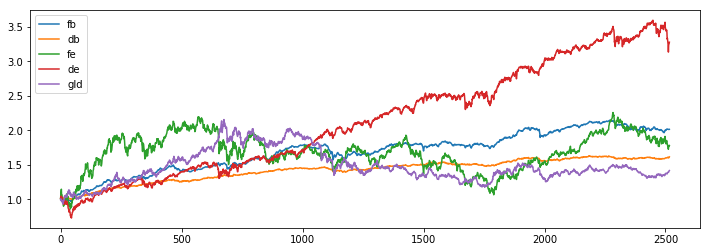

In [304]:
figsize(12,4)
plot(fb['return'].cumprod(),label='fb')
plot(db['return'].cumprod(),label='db')
plot(fe['return'].cumprod(),label='fe')
plot(de['return'].cumprod(),label='de')
plot(gld['return'].cumprod(),label='gld')
plt.legend()

In [360]:
# rebalance at the end of each month

fe['weight'] = 0.25
fb['weight'] = 0.15
de['weight'] = 0.3
db['weight'] = 0.2
gld['weight'] = 0.1
total_weight = pd.Series(np.zeros(len(fe)))
total_weight.index = np.arange(1,len(fe)+1)

for i in ['fe','fb','de','db','gld']:
    eval("{}".format(i))['month'] = eval("{}".format(i))['caldt'].map(lambda x: str(x)[4:6])
    eval("{}".format(i))['month'] = eval("{}".format(i))['month'].astype(float)
    eval("{}".format(i))['weight'] = np.where(eval("{}".format(i))['month'].shift(-1) == eval("{}".format(i))['month'],\
                                              eval("{}".format(i))['weight'].shift(-1)* eval("{}".format(i))['return'],\
                                              eval("{}".format(i))['weight'])
    total_weight += eval("{}".format(i))['weight']

for i in ['fe','fb','de','db','gld']:
    eval("{}".format(i))['weight'] = eval("{}".format(i))['weight']/total_weight
    


In [361]:
portfolio = pd.DataFrame(np.array([np.zeros(len(fe)),fe['year']]).T,columns=['return','year'])
portfolio.index = np.arange(1,len(fe)+1)

for i in ['fe','fb','de','db','gld']:
    portfolio['return'] += eval("{}".format(i))['weight'] * eval("{}".format(i))['dret']

portfolio['return'] += 1
p_annual_ret = portfolio.groupby('year').prod() - 1
p_annualized_return = ((p_annual_ret['return']+1).prod())**0.1 - 1
p_annualized_std = p_annual_ret['return'].std()
p_sharpe = p_annualized_return/p_annualized_std

portfolio['max'] = 0.0
portfolio['cum_ret'] = portfolio['return'].cumprod()

for i in range(len(portfolio)):
    if i <= 252:
        portfolio['max'][i+1] = max(portfolio['cum_ret'][:i+1])
    else:
        portfolio['max'][i+1] = max(portfolio['cum_ret'][i+1-252:i+1])

portfolio['drawdown'] = (portfolio['max'] - portfolio['cum_ret']) / portfolio['max']

In [362]:
print(p_annualized_return)
print(p_annualized_std)
print(p_sharpe)
print(max(portfolio['drawdown']))

0.0967918095298792
0.12735250197149908
0.7600306867276214
0.14195962322953884


In [330]:
def random_weights(n):
    
    weight = []
    
    for i in range(n):
        temp = random.random(5)
        temp = temp/sum(temp)
        if len(temp[temp <= 0.45]) == 5:
            weight.append(temp)

    return weight


In [358]:
weight = random_weights(1000)

p2_annualized_return = []
p2_annualized_std = []
p2_sharpe = []

total_weight = pd.Series(np.zeros(len(fe)))
total_weight.index = np.arange(1,len(fe)+1)

portfolio = pd.DataFrame(np.array([np.zeros(len(fe)),fe['year']]).T,columns=['return','year'])
portfolio.index = np.arange(1,len(fe)+1)

for ii in range(len(weight)):
    fe['weight'] = weight[ii][0]
    fb['weight'] = weight[ii][1]
    de['weight'] = weight[ii][2]
    db['weight'] = weight[ii][3]
    gld['weight'] = weight[ii][4]


    for i in ['fe','fb','de','db','gld']:
        eval("{}".format(i))['month'] = eval("{}".format(i))['caldt'].map(lambda x: str(x)[4:6])
        eval("{}".format(i))['month'] = eval("{}".format(i))['month'].astype(float)
        eval("{}".format(i))['weight'] = np.where(eval("{}".format(i))['month'].shift(-1) == eval("{}".format(i))['month'],\
                                                  eval("{}".format(i))['weight'].shift(-1)* eval("{}".format(i))['return'],\
                                                  eval("{}".format(i))['weight'])
        total_weight += eval("{}".format(i))['weight']

    for i in ['fe','fb','de','db','gld']:
        eval("{}".format(i))['weight'] = eval("{}".format(i))['weight']/total_weight


    for i in ['fe','fb','de','db','gld']:
        portfolio['return'] += eval("{}".format(i))['weight'] * eval("{}".format(i))['dret']

    portfolio['return'] += 1
    p_annual_ret = portfolio.groupby('year').prod() - 1
    p2_annualized_return.append(((p_annual_ret['return']+1).prod())**0.1 - 1)
    p2_annualized_std.append(p_annual_ret['return'].std())
    p2_sharpe.append(p2_annualized_return[ii]/p2_annualized_std[ii])
    
    total_weight = pd.Series(np.zeros(len(fe)))
    total_weight.index = np.arange(1,len(fe)+1)

    portfolio = pd.DataFrame(np.array([np.zeros(len(fe)),fe['year']]).T,columns=['return','year'])
    portfolio.index = np.arange(1,len(fe)+1)



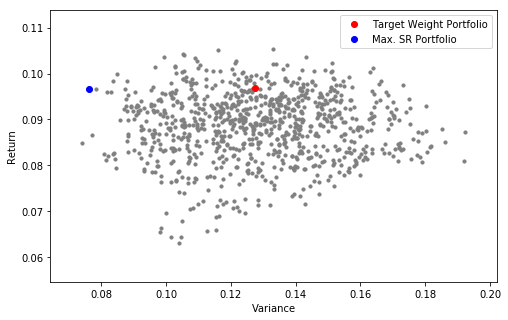

In [377]:
figsize(8,5)
scatter(p2_annualized_std,p2_annualized_return,c='grey',s=10)
scatter(p_annualized_std,p_annualized_return,c='red',label='Target Weight Portfolio')
scatter(p_best_annualized_std,p_best_annualized_return,c='blue',label='Max. SR Portfolio')
xlabel('Variance')
ylabel('Return')
legend()

In [305]:
best_weight = weight[p_sharpe.index(max(p_sharpe))]
best_weight

array([0.00632175, 0.31199261, 0.41809961, 0.23469241, 0.02889362])

In [328]:
fe['weight'] = best_weight[0]
fb['weight'] = best_weight[1]
de['weight'] = best_weight[2]
db['weight'] = best_weight[3]
gld['weight'] = best_weight[4]
total_weight = pd.Series(np.zeros(len(fe)))
total_weight.index = np.arange(1,len(fe)+1)

for i in ['fe','fb','de','db','gld']:
    eval("{}".format(i))['month'] = eval("{}".format(i))['caldt'].map(lambda x: str(x)[4:6])
    eval("{}".format(i))['month'] = eval("{}".format(i))['month'].astype(float)
    eval("{}".format(i))['weight'] = np.where(eval("{}".format(i))['month'].shift(-1) == eval("{}".format(i))['month'],\
                                              eval("{}".format(i))['weight'].shift(-1)* eval("{}".format(i))['return'],\
                                              eval("{}".format(i))['weight'])
    total_weight += eval("{}".format(i))['weight']

for i in ['fe','fb','de','db','gld']:
    eval("{}".format(i))['weight'] = eval("{}".format(i))['weight']/total_weight
    
p_best = pd.DataFrame(np.array([np.zeros(len(fe)),fe['year']]).T,columns=['return','year'])
p_best.index = np.arange(1,len(fe)+1)

for i in ['fe','fb','de','db','gld']:
    p_best['return'] += eval("{}".format(i))['weight'] * eval("{}".format(i))['dret']

p_best['return'] += 1
p_best_annual_ret = p_best.groupby('year').prod() - 1
p_best_annualized_return = ((p_best_annual_ret['return']+1).prod())**0.1 - 1
p_best_annualized_std = p_best_annual_ret['return'].std()
p_best_sharpe = p_best_annualized_return/p_best_annualized_std

p_best['max'] = 0.0
p_best['cum_ret'] = p_best['return'].cumprod()

for i in range(len(p_best)):
    if i <= 252:
        p_best['max'][i+1] = max(p_best['cum_ret'][:i+1])
    else:
        p_best['max'][i+1] = max(p_best['cum_ret'][i+1-252:i+1])

p_best['drawdown'] = (p_best['max'] - p_best['cum_ret']) / p_best['max']

In [329]:
print(p_best_annualized_return)
print(p_best_annualized_std)
print(p_best_sharpe)
print(max(p_best['drawdown']))

0.09661310818694702
0.07622222339139247
1.2675188926312169
0.1460709176111467


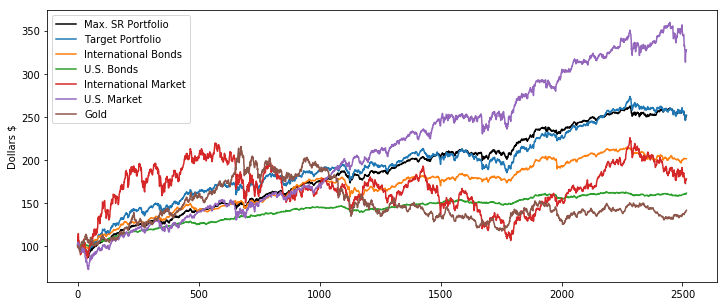

In [345]:
figsize(12,5)
plot(100*p_best['return'].cumprod(),label='Max. SR Portfolio',c='black')
plot(100*portfolio['return'].cumprod(),label='Target Portfolio')
plot(100*fb['return'].cumprod(),label='International Bonds')
plot(100*db['return'].cumprod(),label='U.S. Bonds')
plot(100*fe['return'].cumprod(),label='International Market')
plot(100*de['return'].cumprod(),label='U.S. Market')
plot(100*gld['return'].cumprod(),label='Gold')
plt.ylabel('Dollars $')
plt.legend()